In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('Spotify_Youtuben.csv')
df.head(1)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [79]:
# Eliminate unnecessary columns from the dataset for our analysis by removing Url_spotify, Uri, Key, Url_youtube, and 
# Description.

# Remove unnecessary columns
columns_to_remove = ['Url_spotify', 'Uri', 'Key', 'Url_youtube', 'Description']
df = df.drop(columns=columns_to_remove)

# Print the cleaned dataset
df.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.177,0.00836,0.00233,...,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09


In [80]:
print(df.columns)

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')


In [81]:
# Examine the dataset for the presence of null values and calculate the total count of null values for each column, 
# providing insights into the data's completeness and potential data quality issues.

# Fill missing values in numeric columns with mean
numeric_cols = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
                'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
                'Views', 'Likes', 'Comments']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = ['Artist', 'Track', 'Album', 'Album_type', 'Title', 'Channel',
                    'Licensed', 'official_video', 'Stream']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Drop rows with remaining null values
df = df.dropna()

# Print the count of null values after handling missing values
print(df.isnull().sum())


Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64


In [82]:
# Identify and eliminate duplicate records in the dataset while retaining the first occurrence of each unique value. 
# This ensures data integrity by removing redundant information and maintaining the original data structure.

# Print the count of duplicate records
print("Count of duplicate records:", df.duplicated().sum())

# Drop duplicate records while retaining the first occurrence
df.drop_duplicates(keep='first', inplace=True)

# Print the count of duplicate records after removing duplicates
print("Count of duplicate records after removing duplicates:", df.duplicated().sum())

Count of duplicate records: 5
Count of duplicate records after removing duplicates: 0


In [83]:
print(df.columns)

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')


In [84]:
# Convert the duration in milliseconds to minutes, facilitating a clearer comprehension and representation of time 
# intervals in a more user-friendly format.

# Convert duration from milliseconds to minutes
df['Duration_min'] = df['Duration_ms'] / 60000

# Print the updated DataFrame
df['Duration_min'].head()

0    3.710667
1    3.336217
2    3.585833
3    3.897783
4    5.682000
Name: Duration_min, dtype: float64

In [85]:
print(df.columns)

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'Duration_min'],
      dtype='object')


In [86]:
# Eliminate track names that are deemed irrelevant and begin with the "?" character, ensuring the dataset only 
# includes relevant and meaningful track information for further analysis or processing.

# Filter out rows with track names that begin with "?"
df = df[~df['Track'].str.startswith('?')]

# Print the updated DataFrame
df.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,Duration_min
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.177,0.00836,0.00233,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,3.710667


In [87]:
# Compute the Energy to Liveness ratio for each track, quantifying the relationship between energy and liveliness attributes.
# The resulting ratios are then stored in a column named 'EnergyLiveness' for further analysis or interpretation.

# Compute the Energy to Liveness ratio
df['EnergyLiveness'] = df['Energy'] / df['Liveness']

# Print the updated DataFrame
df.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,Duration_min,EnergyLiveness
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.177,0.00836,0.00233,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,3.710667,1.150082


In [88]:
# Modify the data type of the 'views' column to float, enabling numerical operations and facilitating its utilization 
# in subsequent analysis or calculations requiring floating-point values.

# Modify the data type of the 'Views' column to float
df['Views'] = df['Views'].astype(float)

# Print the updated DataFrame with the modified data type
df.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,Duration_min,EnergyLiveness
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.177,0.00836,0.00233,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,3.710667,1.150082


In [89]:
# Analyze the 'views' and 'stream' columns to determine the dominant platform (YouTube or Spotify) on which a song 
# track was most played. Create a new column called 'most_playedon' with values 'Spotify' or 'YouTube' indicating 
# the platform with the highest play count for each song track.

# Create a new column 'most_playedon' indicating the dominant platform
df['most_playedon'] = ''
df.loc[df['Views'] > df['Stream'], 'most_playedon'] = 'YouTube'
df.loc[df['Views'] < df['Stream'], 'most_playedon'] = 'Spotify'

# Print the updated DataFrame with the 'most_playedon' column
df.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Channel,Views,Likes,Comments,Licensed,official_video,Stream,Duration_min,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.177,0.00836,0.00233,...,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,3.710667,1.150082,Spotify


In [90]:
print(df.columns)

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'Duration_min', 'EnergyLiveness', 'most_playedon'],
      dtype='object')


In [91]:
# Identify duplicate records based on all columns
duplicates = df.duplicated(keep='first')

# Filter the dataset to retain only the first occurrence of each unique value
df = df[~duplicates]

In [92]:
# Which is the most viewed song track on youtube?

# Filter the DataFrame to include only tracks played on YouTube
df_youtube = df[df['most_playedon'] == 'YouTube']

# Sort the YouTube DataFrame by 'Views' column in descending order
df_youtube_sorted = df_youtube.sort_values(by='Views', ascending=False)

# Retrieve the most viewed song track on YouTube
most_viewed_track = df_youtube_sorted.iloc[0]['Track']

# Print the most viewed song track on YouTube
print("The most viewed song track on YouTube is:", most_viewed_track)

The most viewed song track on YouTube is: Despacito


In [93]:
# Which Song track is streamed most on Spotify?

# Filter the DataFrame to include only tracks streamed on Spotify
df_spotify = df[df['most_playedon'] == 'Spotify']

# Sort the Spotify DataFrame by 'Stream' column in descending order
df_spotify_sorted = df_spotify.sort_values(by='Stream', ascending=False)

# Retrieve the most streamed song track on Spotify
most_streamed_track = df_spotify_sorted.iloc[0]['Track']

# Print the most streamed song track on Spotify
print("The most streamed song track on Spotify is:", most_streamed_track)

The most streamed song track on Spotify is: Blinding Lights


In [94]:
# EnergyLiveness ratio is one of the popular ways to measure the quality of a song, 
# which are the top 5 songs that have the highest energyliveness ratio.

# Sort the DataFrame by 'EnergyLiveness' column in descending order
df_sorted_ratio = df.sort_values(by='EnergyLiveness', ascending=False)

# Get the top 5 songs with the highest EnergyLiveness ratio
top_5_ratio_songs = df_sorted_ratio.head(5)

# Print the top 5 songs with the highest EnergyLiveness ratio
print("Top 5 songs with the highest EnergyLiveness ratio:")
print(top_5_ratio_songs[['Track', 'EnergyLiveness']])

Top 5 songs with the highest EnergyLiveness ratio:
                                    Track  EnergyLiveness
20636                             Take It       59.113924
11694                         Verano Azul       58.000000
8844                           Salvavidas       57.655172
6555                        Ants Marching       54.522293
12253  Eres Mi Sueño - Versión Radio Edit       51.381215


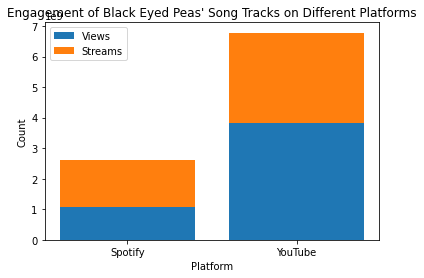

In [95]:
# Let us assume a situation where an artist named Black Eyed Peas wants to analyze his songs. 
# The artist wants to know which platform is capable of keeping his song track more engaged. 
# To check this he assigns you this task and wants you to report to him where his song tracks are more played on. 
# Compare the platforms.

# Filter the DataFrame for Black Eyed Peas' song tracks
df_artist = df[df['Artist'] == 'Black Eyed Peas']

# Calculate the total views and streams for each platform
total_views_spotify = df_artist[df_artist['most_playedon'] == 'Spotify']['Views'].sum()
total_streams_spotify = df_artist[df_artist['most_playedon'] == 'Spotify']['Stream'].sum()

total_views_youtube = df_artist[df_artist['most_playedon'] == 'YouTube']['Views'].sum()
total_streams_youtube = df_artist[df_artist['most_playedon'] == 'YouTube']['Stream'].sum()

# Create a stacked bar graph to compare the engagement on different platforms
platforms = ['Spotify', 'YouTube']
views = [total_views_spotify, total_views_youtube]
streams = [total_streams_spotify, total_streams_youtube]

plt.bar(platforms, views, label='Views')
plt.bar(platforms, streams, bottom=views, label='Streams')

plt.xlabel('Platform')
plt.ylabel('Count')
plt.title("Engagement of Black Eyed Peas' Song Tracks on Different Platforms")
plt.legend()
plt.show()

In [96]:
# Gorillaz wants to know their most liked song on youtube. 
# Report to them with their most liked song along with the Energy and Tempo of the song.

# Filter the DataFrame for Gorillaz's songs
df_gorillaz = df[df['Artist'] == 'Gorillaz']

# Sort the DataFrame by 'Likes' column in descending order
df_gorillaz_sorted = df_gorillaz.sort_values(by='Likes', ascending=False)

# Retrieve the most liked song and its corresponding Energy and Tempo
most_liked_song = df_gorillaz_sorted.iloc[0]['Track']
energy = df_gorillaz_sorted.iloc[0]['Energy']
tempo = df_gorillaz_sorted.iloc[0]['Tempo']

# Print the most liked song and its Energy and Tempo
print("Gorillaz's most liked song on YouTube is:", most_liked_song)
print("Energy:", energy)
print("Tempo:", tempo)

Gorillaz's most liked song on YouTube is: Feel Good Inc.
Energy: 0.705
Tempo: 138.559


In [97]:
# Which Album types are more prominent on Spotify?

# Filter the DataFrame for songs on Spotify
df_spotify = df[df['most_playedon'] == 'Spotify']

# Count the occurrences of each album type
album_type_counts = df_spotify['Album_type'].value_counts()

# Sort the album type counts in descending order
album_type_counts = album_type_counts.sort_values(ascending=False)

# Print the distribution of album types
print(album_type_counts)

album          11841
single          3509
compilation      578
Name: Album_type, dtype: int64


In [98]:
# Spotify's most loved song tracks are to be declared soon. 
# Help Spotify choose the top 5 most streamed+youtube viewed song track.

# Assuming your DataFrame is stored in a variable called 'df'

# Calculate the combined views and streams for each song track
df['Total_Views_Streams'] = df['Views'] + df['Stream']

# Sort the DataFrame by the combined views and streams in descending order
df_sorted = df.sort_values(by='Total_Views_Streams', ascending=False)

# Retrieve the top 5 most streamed and YouTube viewed song tracks
top_5_tracks = df_sorted.head(5)

# Print the top 5 tracks
print(top_5_tracks[['Track', 'Total_Views_Streams']])

                                    Track  Total_Views_Streams
1150                            Despacito         9.586248e+09
367                             Despacito         9.586245e+09
12455                        Shape of You         9.270404e+09
14585  See You Again (feat. Charlie Puth)         7.295053e+09
12472  See You Again (feat. Charlie Puth)         7.295052e+09
